In [1]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# TODO: Change it to your tesseract exe path.
TESSETRACT_PATH = r"D:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
# TODO: Change it to your tesseract exe path.
IMAGES_PATH = [r"D:\Projects\PyCharmProjects\watsonTraining\images_google\popups\warning-you-have-excessive-popups.png"]

In [3]:
pytesseract.pytesseract.tesseract_cmd = TESSETRACT_PATH

In [4]:
def main():
    for img_path in IMAGES_PATH:
        # load the example image and convert it to grayscale
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # check to see if we should apply thresholding to preprocess theimage
        gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        # write the grayscale image to disk as a temporary file so we can
        # apply OCR to it
        filename = "{}.png".format(os.getpid())
        cv2.imwrite(filename, gray)

        # load the image as a PIL/Pillow image, apply OCR, and then delete
        # the temporary file
        text = pytesseract.image_to_string(Image.open(filename))
        os.remove(filename)
        img = mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()
        print(text)

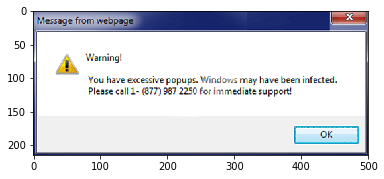

Warning!

You have excessive popups, Windows may have been infected,
Please call 1- (877) 987 2250 for immediate support!


In [5]:
main()